In [2]:
import sys
import torch
import numpy as np
from matplotlib import pyplot as plt
import logging

sys.path.append("../../")
import manifold_flow as mf
from manifold_flow import transforms, utils, flows, distributions, training
from manifold_flow import nn as nn_

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Debug

In [9]:
x = torch.tensor([10,11,12,13,14])
permutation = torch.tensor([1,3,4,0,2],dtype=torch.long)

In [10]:
torch.index_select(x,0,permutation)

tensor([11, 13, 14, 10, 12])

## Data

In [2]:
n = 1000
x0 = torch.randn(n).view(-1,1)
x1 = 0.5*(1.5 + x0)*(1.5-x0)

x = torch.cat([x0,x1],1)

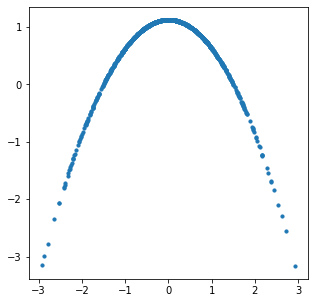

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x0.numpy(), x1.numpy(), s=10.)
plt.show()

## Model

In [4]:
trf = flows.vector_transforms.create_transform(
    dim=2,
    flow_steps=3,
    linear_transform_type="permutation",
    base_transform_type="affine-coupling",
    hidden_features=5,
    num_transform_blocks=2,
    dropout_probability=0.,
    use_batch_norm=False
)

In [5]:
flow = flows.autoencoding_flow.TwoStepAutoencodingFlow(
    data_dim=2,
    latent_dim=1,
    inner_transform=None,
    outer_transform=trf,
)

14:27 manifold_flow.flows.autoencodi DEBUG   Set up projection from vector with dimension 2 to vector with dimension 1
14:27 manifold_flow.flows.autoencodi DEBUG   Created autoencoding flow with 0.0 M parameters (0.0 M trainable) with an estimated size of 0.0 GB


In [6]:
x_reco_before, log_prob_before, u_before = flow(x)
x_gen_before = flow.sample(n=1000)

RuntimeError: matrices expected, got 3D, 3D tensors at /Users/distiller/project/conda/conda-bld/pytorch_1556653492823/work/aten/src/TH/generic/THTensorMath.cpp:956

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x_reco_before.detach().numpy()[:,0], x_reco_before.detach().numpy()[:,1], s=10.)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x_gen_before.detach().numpy()[:,0], x_gen_before.detach().numpy()[:,1], s=10.)
plt.show()